In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [45]:
data=pd.read_csv("Data-Week6.csv")
data.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,1,sat,82.1,3.7,9.3,2.9,5.3,78,3.1
1,1,sun,18.7,1.1,171.4,0.0,5.2,100,0.9
2,2,mon,84.0,9.3,34.0,2.1,13.9,40,5.4


In [46]:
x= data[['temp','wind']].values
y=data['month']

In [47]:
clf=GaussianNB()
clf.fit(X,y)

GaussianNB()

In [48]:
xmin=X.min()
xmax=X.max()
print(xmin)
print(xmax)

0.4
33.3


In [49]:
rng=np.random.RandomState(0)

In [50]:
Xnew = [-6,-13] + [11,18] * rng.rand(2000,2)
ynew = clf.predict(Xnew)
Xnew

array([[ 0.03694854, -0.12659141],
       [ 0.63039714, -3.19210271],
       [-1.33979721, -1.37390596],
       ...,
       [-4.68105704, -6.70649139],
       [-1.21639008,  1.94005305],
       [ 4.26086801, -7.44990818]])

(0.6450000000000002, 34.855, -0.04999999999999999, 9.85)

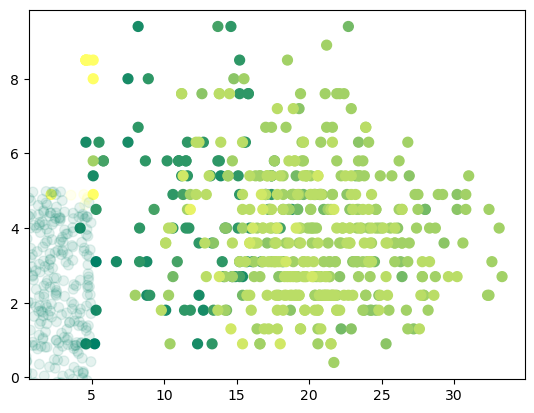

In [51]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap="summer")
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=50, cmap='summer', alpha=0.1)
plt.axis(lim)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred=gnb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred)
conf

array([[ 2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  8,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  6,  3,  0],
       [ 0,  3,  0,  0,  0, 17, 14,  0],
       [ 0,  5,  0,  0,  0, 16, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

Interpretation:

The graph just illustrates feature space in visual form, which shows the dataset distribution as a function of temperature and wind speed. It helps us to understand the patterns or trends in the weather conditions by visualizing these data sets as clusters or groups of this kind of data. This makes the development of knowledge of the joint distribution of temperature and wind-speed variables possible and also allows for the identification of localities where particular weather conditions are common. Furthermore, the graph illustrates that the Gaussian Naive Bayes model has the ability to predict the month label from new data by assigning the month label when it sees a new data dot based on the previously learned patterns of the data. The cloud of data points colored directly for the expected months of occurrence shows the high missional accuracy of my model in projecting label months for any wind and temperature combination. Finally, the graph is helpful for depicting how temperature changes with wind speed; this helps in weather prediction, analysis, and mechanism understanding of the decision boundaries in the data space.